# Read Corpus for FinBERT Training

In [3]:
import pickle

with open('/kaggle/input/data-judul-berita-sektoral/df_bursa_sektor_only.pickle', 'rb') as f:
    df_bursa = pickle.load(f)

df_bursa

{'A':       Only_Date                                   Title_Translated
 0    2021-01-25  Northstar Group to Release Control of DOID Sha...
 1    2021-01-25  Coal prices predicted to rise, see these Bukit...
 2    2021-01-25  Oil prices fall for second session, Covid-19 l...
 3    2021-01-25  Back in trade today, watch the movement of CAN...
 4    2021-01-26  Slowly Coal Prices Ready to Taste US$ 90/ton L...
 ...         ...                                                ...
 9740 2025-01-31  This is What PLN Says About Carbon Market & PL...
 9741 2025-01-31  Oil Prices Set for Weekly Drop, Trump Tariff T...
 9742 2025-01-31  World Oil Prices Weaken Friday (31/1), Brent t...
 9743 2025-01-31  Oil Prices Rise Slightly on Friday (31/1) Ahea...
 9744 2025-01-31  Profit Up 19.55% in 2024, Rig Tenders (RIGS) S...
 
 [9745 rows x 2 columns],
 'B':        Only_Date                                   Title_Translated
 0     2021-01-25  Buying Stocks Using 'Hot Money', Here's Lo Khe...
 1     2

# Menggabungkan Semua DF

In [4]:
import pandas as pd

df_all = pd.concat(
    [df.assign(Sector=key) for key, df in df_bursa.items()],
    ignore_index=True
)

print(df_all.head())
len(df_all)

   Only_Date                                   Title_Translated Sector
0 2021-01-25  Northstar Group to Release Control of DOID Sha...      A
1 2021-01-25  IHSG Drops 2.5%, MOST Mandiri Sekuritas Makes ...      A
2 2021-01-25  11.00 WIB: Rupiah Still Stagnant at IDR 14,020...      A
3 2021-01-25  12.00 WIB: Rupiah Has Not Moved From IDR 14,02...      A
4 2021-01-25  There's a Fed Meeting This Week, Is Rupiah Afr...      A


344916

In [5]:
df_all = df_all[["Only_Date", "Title_Translated"]]
df_all

,Only_Date,Title_Translated
0,2021-01-25,Northstar Group to Release Control of DOID Sha...
1,2021-01-25,"IHSG Drops 2.5%, MOST Mandiri Sekuritas Makes ..."
2,2021-01-25,"11.00 WIB: Rupiah Still Stagnant at IDR 14,020..."
3,2021-01-25,"12.00 WIB: Rupiah Has Not Moved From IDR 14,02..."
4,2021-01-25,"There's a Fed Meeting This Week, Is Rupiah Afr..."
...,...,...
344911,2025-01-31,Peek at Stocks That Many Foreigners Dumped in ...
344912,2025-01-31,Trump's Tariff Threats Expand to BRICS Pressur...
344913,2025-01-31,"Weak, Rupiah Spot Closed Weaker 0.30% to IDR 1..."
344914,2025-01-31,Rupiah Weakens in the Short Week of End of Jan...


# Drop Duplicates

In [6]:
df_all = df_all.drop_duplicates().reset_index(drop=True)
df_all

,Only_Date,Title_Translated
0,2021-01-25,Northstar Group to Release Control of DOID Sha...
1,2021-01-25,"IHSG Drops 2.5%, MOST Mandiri Sekuritas Makes ..."
2,2021-01-25,"11.00 WIB: Rupiah Still Stagnant at IDR 14,020..."
3,2021-01-25,"12.00 WIB: Rupiah Has Not Moved From IDR 14,02..."
4,2021-01-25,"There's a Fed Meeting This Week, Is Rupiah Afr..."
...,...,...
94027,2025-01-13,"War Heats Up, Ukraine Captures North Korean So..."
94028,2025-01-13,Bakrie Group Issuer (VKTR) Operates 20 TransJa...
94029,2025-01-16,"Check BIRD, BRMS, ENRG and ESSA Stock Recommen..."
94030,2025-01-20,Newport Marine (BOAT) Targets Tender Opportuni...


In [8]:
print(df_all['Title_Translated'].isna().sum())

0


# Text Cleaning

In [9]:
import re
import pandas as pd

def clean_text(text):
    text = re.sub(r'[\U00010000-\U0010FFFF]', '', text)  # Menghapus emoji
    text = re.sub(r'[^\w\s%$,.-/]', '', text)  # Menyisakan huruf, angka, %, $, , . -
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.replace("Rp", "IDR") 
    return text

df_all['Cleaned_Title'] = df_all['Title_Translated'].apply(clean_text)
df_all

,Only_Date,Title_Translated,Cleaned_Title
0,2021-01-25,Northstar Group to Release Control of DOID Sha...,Northstar Group to Release Control of DOID Sha...
1,2021-01-25,"IHSG Drops 2.5%, MOST Mandiri Sekuritas Makes ...","IHSG Drops 2.5%, MOST Mandiri Sekuritas Makes ..."
2,2021-01-25,"11.00 WIB: Rupiah Still Stagnant at IDR 14,020...","11.00 WIB Rupiah Still Stagnant at IDR 14,020/US$"
3,2021-01-25,"12.00 WIB: Rupiah Has Not Moved From IDR 14,02...","12.00 WIB Rupiah Has Not Moved From IDR 14,020..."
4,2021-01-25,"There's a Fed Meeting This Week, Is Rupiah Afr...","Theres a Fed Meeting This Week, Is Rupiah Afra..."
...,...,...,...
94027,2025-01-13,"War Heats Up, Ukraine Captures North Korean So...","War Heats Up, Ukraine Captures North Korean So..."
94028,2025-01-13,Bakrie Group Issuer (VKTR) Operates 20 TransJa...,Bakrie Group Issuer VKTR Operates 20 TransJaka...
94029,2025-01-16,"Check BIRD, BRMS, ENRG and ESSA Stock Recommen...","Check BIRD, BRMS, ENRG and ESSA Stock Recommen..."
94030,2025-01-20,Newport Marine (BOAT) Targets Tender Opportuni...,Newport Marine BOAT Targets Tender Opportunity...


In [9]:
import torch
print(f"Jumlah GPU tersedia: {torch.cuda.device_count()}")


Jumlah GPU tersedia: 2


# Retrain FinBERT

In [11]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
import torch
import os
os.environ["WANDB_DISABLED"] = "true"

# Mengecek Ketersediaan GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load tokenizer FinBERT
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

# Load dataset
df = df_all.copy()

# Pisahkan dataset menjadi train (90%) dan test (10%)
train_texts, test_texts = train_test_split(df["Cleaned_Title"].tolist(), test_size=0.1, random_state=42)

# Konversi ke format Hugging Face DatasetDict
dataset = DatasetDict({
    "train": Dataset.from_dict({"Cleaned_Title": train_texts}),
    "test": Dataset.from_dict({"Cleaned_Title": test_texts}),
})

# Tokenisasi dataset
def tokenize_function(examples):
    return tokenizer(examples["Cleaned_Title"], truncation=True, padding="max_length", max_length=128)
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["Cleaned_Title"])

# Load model FinBERT
model = AutoModelForMaskedLM.from_pretrained("ProsusAI/finbert").to(device)

# Data collator untuk MLM
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

training_args = TrainingArguments(
    output_dir="finbert_update",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=10,
    per_device_train_batch_size=32,  # Batch lebih besar supaya optimal
    per_device_eval_batch_size=32,
    gradient_accumulation_steps=2,  # Agar batch efektif lebih besar
    weight_decay=0.01,
    save_total_limit=2,
    logging_dir="logs_A",
    fp16=True,  # Aktifkan mixed precision training
    dataloader_num_workers=4,  # Gunakan lebih banyak worker untuk loading data
    report_to="none",
    ddp_find_unused_parameters=False,  # Optimasi DDP
    optim="adamw_torch",  # Gunakan optimizer dari PyTorch untuk lebih cepat
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()
model.save_pretrained("finbert_update")
tokenizer.save_pretrained("finbert_update")

print("✅ Fine-tuning FinBERT selesai dan model telah disimpan!")


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/84628 [00:00<?, ? examples/s]

Map:   0%|          | 0/9404 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of BertForMaskedLM were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['cls.predictions.bias', 'cls.predicti

Epoch,Training Loss,Validation Loss
1,3.627500,2.344653
2,2.390400,1.985873
3,2.056800,1.775306
4,1.768900,1.658532
5,1.693400,1.580143
6,1.622600,1.529243
7,1.529500,1.497478
8,1.500700,1.486304
9,1.437300,1.445165


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

✅ Fine-tuning FinBERT untuk sektor A selesai dan model telah disimpan!


# Komparasi embedding before dan after tuning

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load FinBERT sebelum fine-tuning (original) dan setelah fine-tuning (finbert_A)
original_model = AutoModel.from_pretrained("ProsusAI/finbert")
original_tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
fine_tuned_model = AutoModel.from_pretrained("/kaggle/working/finbert_update")
fine_tuned_tokenizer = AutoTokenizer.from_pretrained("/kaggle/working/finbert_update")

test_words = ["IHSG", "rupiah", "BBCA", "saham", "bullish"]

# Tokenisasi
original_inputs = original_tokenizer(test_words, padding=True, truncation=True, return_tensors="pt")
fine_tuned_inputs = fine_tuned_tokenizer(test_words, padding=True, truncation=True, return_tensors="pt")

# Ambil embedding dari model
with torch.no_grad():
    original_outputs = original_model(**original_inputs)
    fine_tuned_outputs = fine_tuned_model(**fine_tuned_inputs)

# Ambil representasi vektor dari token [CLS]
original_embedding = original_outputs.last_hidden_state[:, 0, :]
fine_tuned_embedding = fine_tuned_outputs.last_hidden_state[:, 0, :]

# Hitung perbedaan embedding
diff = torch.norm(original_embedding - fine_tuned_embedding, dim=1)

# Print hasil
for word, d in zip(test_words, diff):
    print(f"Perbedaan embedding untuk '{word}': {d.item()}")


Some weights of BertModel were not initialized from the model checkpoint at /kaggle/working/finbert_update and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Perbedaan embedding untuk 'IHSG': 21.11822509765625
Perbedaan embedding untuk 'rupiah': 19.78203010559082
Perbedaan embedding untuk 'BBCA': 17.02944564819336
Perbedaan embedding untuk 'saham': 18.11056900024414
Perbedaan embedding untuk 'bullish': 16.23308563232422


In [16]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
import torch
import os
os.environ["WANDB_DISABLED"] = "true"

# Cek apakah GPU tersedia
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load tokenizer FinBERT
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

df = df_all.copy()

# Pisahkan dataset menjadi train (90%) dan test (10%)
train_texts, test_texts = train_test_split(df["Cleaned_Title"].tolist(), test_size=0.1, random_state=42)

# Konversi ke format Hugging Face DatasetDict
dataset = DatasetDict({
    "train": Dataset.from_dict({"Cleaned_Title": train_texts}),
    "test": Dataset.from_dict({"Cleaned_Title": test_texts}),
})

# Tokenisasi dataset
def tokenize_function(examples):
    return tokenizer(examples["Cleaned_Title"], truncation=True, padding="max_length", max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["Cleaned_Title"])

# Load model FinBERT
model = AutoModelForMaskedLM.from_pretrained("ProsusAI/finbert").to(device)

# Data collator untuk MLM
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

training_args = TrainingArguments(
    output_dir="finbert_update",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=10,
    per_device_train_batch_size=32,  # Batch lebih besar supaya optimal
    per_device_eval_batch_size=32,
    gradient_accumulation_steps=2,  # Agar batch efektif lebih besar
    weight_decay=0.01,
    save_total_limit=2,
    logging_dir="logs_A",
    fp16=True,  # Aktifkan mixed precision training
    dataloader_num_workers=4,  # Gunakan lebih banyak worker untuk loading data
    report_to="none",
    ddp_find_unused_parameters=False,  # Optimasi DDP
    optim="adamw_torch",  # Gunakan optimizer dari PyTorch untuk lebih cepat
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Jalankan training
trainer.train()

# Simpan model yang sudah di fine-tune
model.save_pretrained("finbert_update")
tokenizer.save_pretrained("finbert_update")

print("✅ Fine-tuning FinBERT untuk sektor A selesai dan model telah disimpan!")


Map:   0%|          | 0/84628 [00:00<?, ? examples/s]

Map:   0%|          | 0/9404 [00:00<?, ? examples/s]

Some weights of BertForMaskedLM were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-155787145e4d>:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along d

Epoch,Training Loss,Validation Loss
1,3.610000,2.337058
2,2.379500,1.971288
3,2.052600,1.763315
4,1.764100,1.651169
5,1.691800,1.577855
6,1.622100,1.521511
7,1.527900,1.495945
8,1.500600,1.483241
9,1.434600,1.440042


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

✅ Fine-tuning FinBERT untuk sektor A selesai dan model telah disimpan!


# Menambahkan token terms saham Indonesia

In [3]:
with open("/kaggle/input/tokens-finbert/tokens.txt", "r") as file:
    content = file.read()

# Menghapus tanda petik tunggal dan koma, lalu membagi menjadi list
tokens = [token.strip().strip("'") for token in content.split(",") if token.strip()]

print(tokens)

['IDX', 'IHSG', 'rights issue', 'buyback', 'dividend yield', 'blue chip', 'penny stock', 'Bank Indonesia', 'OJK', 'interest rate', 'monetary policy', 'inflation target', 'GDP', 'GDP growth', 'IDR', 'forex', 'rupiah depreciation', 'currency swap', 'trade balance', 'BCA', 'BRI', 'Mandiri', 'BNI', 'Telkomsel', 'Pertamina', 'Gojek', 'Tokopedia', 'OVO', 'GoPay', 'DANA', 'Kredivo', 'Akulaku', 'e-Fishery', 'correction', 'market crash', 'oversold', 'FOMO', 'pump and dump', 'acquisition', 'merger', 'IPO', 'compliance', 'regulatory approval', 'Jokowi', 'Sri Mulyani', 'Erick Thohir', 'BUMN', 'Kemenkeu', 'Prabowo', 'Gibran', 'DPR', 'reksadana', 'IHSG', 'rupiah', 'BBCA', 'bearish', 'bullish', 'IDX', 'LQ45', 'bluechip', 'LDR', 'NIM', 'BI Rate', 'OPEC', 'Brent crude', 'lifting minyak', 'BIPI', 'ENRG', 'MEDC', 'MITI', 'SUGI', 'SURE', 'AKRA', 'BULL', 'HITS', 'INPS', 'KOPI', 'LEAD', 'MTFN', 'PGAS', 'RAJA', 'SHIP', 'SOCI', 'ADRO', 'AIMS', 'ARII', 'BOSS', 'BSSR', 'BUMI', 'BYAN', 'DSSA', 'GEMS', 'GTBO', 'H

In [4]:
# Load tokenizer
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("/kaggle/working/finbert_update")

# Add tokens to the tokenizer's vocabulary
num_added_toks = tokenizer.add_tokens(tokens)
print('We have added', num_added_toks, 'tokens')

# Save the updated tokenizer and model
tokenizer.save_pretrained("/kaggle/working/finbert_all")

print("✅ Tokenizer updated and model resized!")


We have added 1662 tokens
✅ Tokenizer updated and model resized!


# Finetuning dengan new tokens

In [10]:
# Load tokenizer
from transformers import AutoTokenizer
from transformers import BertForMaskedLM, Trainer, TrainingArguments
from datasets import Dataset, load_dataset
import torch
from transformers import ProgressCallback

# Path model lama yang sudah di fine-tune
model_path = "/kaggle/working/finbert_update"
tokenizer_path = "/kaggle/working/finbert_all"

# Load tokenizer yang sudah diperbarui
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
model = BertForMaskedLM.from_pretrained(model_path)

# Resize embedding layer supaya cocok sama tokenizer baru
model.resize_token_embeddings(len(tokenizer))

# Load dataset berita saham
data = df_all.copy()

# Pastikan hanya mengambil kolom Title_Translated
dataset = Dataset.from_dict({"text": data["Cleaned_Title"]})


# Tokenisasi data dengan labels
def tokenize_function(examples):
    tokenized = tokenizer(examples["text"], truncation=True, padding="max_length", max_length=64)
    tokenized["labels"] = tokenized["input_ids"].copy()  # Copy input_ids sebagai labels
    return tokenized


# Tokenisasi dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Training arguments dengan logging
training_args = TrainingArguments(
    output_dir="/kaggle/working/finbert_finetuned",
    evaluation_strategy="no",  # Tidak perlu eval karena ini hanya pretraining ulang
    save_strategy="epoch",
    per_device_train_batch_size=8,
    num_train_epochs=2,
    logging_dir="./logs",
    logging_steps=10,  # Log setiap 10 langkah
    save_total_limit=2,
    report_to="none"  # Nonaktifkan pelaporan ke WandB atau TensorBoard jika tidak digunakan
)


# Trainer dengan ProgressCallback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    tokenizer=tokenizer,
    callbacks=[ProgressCallback]  # Tambahkan progress bar
)

# Fine-tune model
trainer.train()

# Simpan model yang sudah di fine-tune ulang
model.save_pretrained("/kaggle/working/finbert_finetuned")
tokenizer.save_pretrained("/kaggle/working/finbert_finetuned")


BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://n

Map:   0%|          | 0/94032 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-10-93f8216b6c85>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


  0%|          | 0/11754 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
10,7.932900
20,2.749700
30,1.578400
40,1.037200
50,0.703200
60,0.589600
70,0.409300
80,0.366300
90,0.319800
100,0.325800


{'loss': 7.9329, 'grad_norm': 20.091493606567383, 'learning_rate': 4.9957461289773695e-05, 'epoch': 0.0}
{'loss': 2.7497, 'grad_norm': 17.199161529541016, 'learning_rate': 4.991492257954739e-05, 'epoch': 0.0}
{'loss': 1.5784, 'grad_norm': 13.689800262451172, 'learning_rate': 4.987238386932108e-05, 'epoch': 0.01}
{'loss': 1.0372, 'grad_norm': 9.913352966308594, 'learning_rate': 4.982984515909478e-05, 'epoch': 0.01}
{'loss': 0.7032, 'grad_norm': 5.675259590148926, 'learning_rate': 4.978730644886847e-05, 'epoch': 0.01}
{'loss': 0.5896, 'grad_norm': 3.09950852394104, 'learning_rate': 4.974476773864217e-05, 'epoch': 0.01}
{'loss': 0.4093, 'grad_norm': 1.6191985607147217, 'learning_rate': 4.970222902841586e-05, 'epoch': 0.01}
{'loss': 0.3663, 'grad_norm': 0.8427236676216125, 'learning_rate': 4.9659690318189554e-05, 'epoch': 0.01}
{'loss': 0.3198, 'grad_norm': 0.6235066056251526, 'learning_rate': 4.961715160796325e-05, 'epoch': 0.02}
{'loss': 0.3258, 'grad_norm': 10.477133750915527, 'learning

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'loss': 0.0122, 'grad_norm': 0.0716981291770935, 'learning_rate': 2.4987238386932112e-05, 'epoch': 1.0}
{'loss': 0.0084, 'grad_norm': 0.03790204972028732, 'learning_rate': 2.4944699676705805e-05, 'epoch': 1.0}
{'loss': 0.0082, 'grad_norm': 0.05262642353773117, 'learning_rate': 2.4902160966479498e-05, 'epoch': 1.0}
{'loss': 0.0067, 'grad_norm': 0.040056243538856506, 'learning_rate': 2.485962225625319e-05, 'epoch': 1.01}
{'loss': 0.0088, 'grad_norm': 0.06402168422937393, 'learning_rate': 2.4817083546026888e-05, 'epoch': 1.01}
{'loss': 0.0112, 'grad_norm': 0.08136896789073944, 'learning_rate': 2.477454483580058e-05, 'epoch': 1.01}
{'loss': 0.0112, 'grad_norm': 0.07512061297893524, 'learning_rate': 2.4732006125574274e-05, 'epoch': 1.01}
{'loss': 0.0113, 'grad_norm': 0.06447646766901016, 'learning_rate': 2.4689467415347967e-05, 'epoch': 1.01}
{'loss': 0.0087, 'grad_norm': 0.025673337280750275, 'learning_rate': 2.464692870512166e-05, 'epoch': 1.01}
{'loss': 0.0078, 'grad_norm': 0.0337500013

('/kaggle/working/finbert_finetuned/tokenizer_config.json',
 '/kaggle/working/finbert_finetuned/special_tokens_map.json',
 '/kaggle/working/finbert_finetuned/vocab.txt',
 '/kaggle/working/finbert_finetuned/added_tokens.json',
 '/kaggle/working/finbert_finetuned/tokenizer.json')

# Read data for inference

In [4]:
import pandas as pd

df_judul_all = pd.concat(
    [df.assign(Sector=key) for key, df in df_judul.items()],
    ignore_index=True
)

# Menampilkan hasil
print(df_judul_all.head())
len(df_judul_all)

   Only_Date                                   Title_Translated Sector
0 2021-01-25  Northstar Group to Release Control of DOID Sha...      A
1 2021-01-25  Coal prices predicted to rise, see these Bukit...      A
2 2021-01-25  Oil prices fall for second session, Covid-19 l...      A
3 2021-01-25  Back in trade today, watch the movement of CAN...      A
4 2021-01-26  Slowly Coal Prices Ready to Taste US$ 90/ton L...      A


95273

In [5]:
df_judul_all

,Only_Date,Title_Translated,Sector
0,2021-01-25,Northstar Group to Release Control of DOID Sha...,A
1,2021-01-25,"Coal prices predicted to rise, see these Bukit...",A
2,2021-01-25,"Oil prices fall for second session, Covid-19 l...",A
3,2021-01-25,"Back in trade today, watch the movement of CAN...",A
4,2021-01-26,Slowly Coal Prices Ready to Taste US$ 90/ton L...,A
...,...,...,...
95268,2025-01-31,Peek at Stocks That Many Foreigners Dumped in ...,All Sector
95269,2025-01-31,Trump's Tariff Threats Expand to BRICS Pressur...,All Sector
95270,2025-01-31,"Weak, Rupiah Spot Closed Weaker 0.30% to IDR 1...",All Sector
95271,2025-01-31,Rupiah Weakens in the Short Week of End of Jan...,All Sector


In [6]:
df_judul_all = df_judul_all.drop_duplicates().reset_index(drop=True)
df_judul_all

,Only_Date,Title_Translated,Sector
0,2021-01-25,Northstar Group to Release Control of DOID Sha...,A
1,2021-01-25,"Coal prices predicted to rise, see these Bukit...",A
2,2021-01-25,"Oil prices fall for second session, Covid-19 l...",A
3,2021-01-25,"Back in trade today, watch the movement of CAN...",A
4,2021-01-26,Slowly Coal Prices Ready to Taste US$ 90/ton L...,A
...,...,...,...
95003,2025-01-31,Peek at Stocks That Many Foreigners Dumped in ...,All Sector
95004,2025-01-31,Trump's Tariff Threats Expand to BRICS Pressur...,All Sector
95005,2025-01-31,"Weak, Rupiah Spot Closed Weaker 0.30% to IDR 1...",All Sector
95006,2025-01-31,Rupiah Weakens in the Short Week of End of Jan...,All Sector


In [7]:
df_judul_all.dropna(inplace=True)  # Drop rows with NaN values
df_judul_all.reset_index(drop=True, inplace=True)  # Reset the index and drop the old index

In [8]:
df_judul_all

,Only_Date,Title_Translated,Sector
0,2021-01-25,Northstar Group to Release Control of DOID Sha...,A
1,2021-01-25,"Coal prices predicted to rise, see these Bukit...",A
2,2021-01-25,"Oil prices fall for second session, Covid-19 l...",A
3,2021-01-25,"Back in trade today, watch the movement of CAN...",A
4,2021-01-26,Slowly Coal Prices Ready to Taste US$ 90/ton L...,A
...,...,...,...
94046,2025-01-31,Peek at Stocks That Many Foreigners Dumped in ...,All Sector
94047,2025-01-31,Trump's Tariff Threats Expand to BRICS Pressur...,All Sector
94048,2025-01-31,"Weak, Rupiah Spot Closed Weaker 0.30% to IDR 1...",All Sector
94049,2025-01-31,Rupiah Weakens in the Short Week of End of Jan...,All Sector


# Cleaning text data

In [9]:
import re
import pandas as pd

def clean_text(text):
    text = re.sub(r'[\U00010000-\U0010FFFF]', '', text)  # Menghapus emoji
    text = re.sub(r'[^\w\s%$,.-/]', '', text)  # Menyisakan huruf, angka, %, $, , . -
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.replace("Rp", "IDR")  # Menstandarkan mata uang Rupiah
    
    return text

df_judul_all['Cleaned_Title'] = df_judul_all['Title_Translated'].apply(clean_text)
df_judul_all

,Only_Date,Title_Translated,Sector,Cleaned_Title
0,2021-01-25,Northstar Group to Release Control of DOID Sha...,A,Northstar Group to Release Control of DOID Sha...
1,2021-01-25,"Coal prices predicted to rise, see these Bukit...",A,"Coal prices predicted to rise, see these Bukit..."
2,2021-01-25,"Oil prices fall for second session, Covid-19 l...",A,"Oil prices fall for second session, Covid19 lo..."
3,2021-01-25,"Back in trade today, watch the movement of CAN...",A,"Back in trade today, watch the movement of CAN..."
4,2021-01-26,Slowly Coal Prices Ready to Taste US$ 90/ton L...,A,Slowly Coal Prices Ready to Taste US$ 90/ton L...
...,...,...,...,...
94046,2025-01-31,Peek at Stocks That Many Foreigners Dumped in ...,All Sector,Peek at Stocks That Many Foreigners Dumped in ...
94047,2025-01-31,Trump's Tariff Threats Expand to BRICS Pressur...,All Sector,Trumps Tariff Threats Expand to BRICS Pressure...
94048,2025-01-31,"Weak, Rupiah Spot Closed Weaker 0.30% to IDR 1...",All Sector,"Weak, Rupiah Spot Closed Weaker 0.30% to IDR 1..."
94049,2025-01-31,Rupiah Weakens in the Short Week of End of Jan...,All Sector,Rupiah Weakens in the Short Week of End of Jan...


# Proses Inference

In [13]:
import numpy as np
import torch
import pandas as pd
from transformers import AutoModel, AutoTokenizer

# List untuk menyimpan semua embeddings
all_dates = []
all_titles = []
all_sectors = []
all_embeddings = []

# Load model & tokenizer
model_path = "/kaggle/working/finbert_finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path)

# Gunakan GPU jika ada
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Konfigurasi
MAX_LEN = 25
BATCH_SIZE = 16  # Kurangi batch size untuk hemat RAM
SAVE_PATH = "finbert_embeddings_all_sectors.npz"

# Fungsi untuk mendapatkan embedding per batch
def get_embeddings_batch(texts):
    inputs = tokenizer(
        texts, return_tensors="pt", truncation=True, padding="max_length", max_length=MAX_LEN
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    return outputs.last_hidden_state.cpu().numpy()  # Shape: (batch_size, 71, 768)

# Looping dalam batch untuk seluruh sektor
for i in range(0, len(df_judul_all), BATCH_SIZE):
    batch_texts = df_judul_all["Cleaned_Title"][i : i + BATCH_SIZE].tolist()  
    batch_sectors = df_judul_all["Sector"][i : i + BATCH_SIZE].tolist()  
    batch_dates = df_judul_all["Only_Date"][i : i + BATCH_SIZE].tolist()  

    # Ambil embedding
    batch_embeddings = get_embeddings_batch(batch_texts)

    # Simpan ke list
    all_titles.extend(batch_texts)
    all_sectors.extend(batch_sectors)
    all_dates.extend(batch_dates)
    all_embeddings.append(batch_embeddings)  # Simpan sebagai list of arrays

# Gabungkan semua batch jadi satu numpy array
all_embeddings = np.vstack(all_embeddings) 

# Simpan dalam format NPZ
np.savez(SAVE_PATH,
         Only_Date=np.array(all_dates),
         Title_Translated=np.array(all_titles),
         Sector=np.array(all_sectors),
         Embedding=all_embeddings)  # Langsung array

print(f"✅ Embedding selesai untuk seluruh sektor! Shape: {all_embeddings.shape}")


Some weights of BertModel were not initialized from the model checkpoint at /kaggle/working/finbert_finetuned and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Embedding selesai untuk seluruh sektor! Shape: (94051, 25, 768)


In [6]:
import pandas as pd
import numpy as np

# Load data
data = np.load("/kaggle/working/finbert-embeddings-sectoral/finbert_embeddings_all_sectors.npz", allow_pickle=True)
data

NpzFile '/kaggle/working/finbert-embeddings-sectoral/finbert_embeddings_all_sectors.npz' with keys: Only_Date, Title_Translated, Sector, Embedding

In [7]:
df = pd.DataFrame({
    "Only_Date": data["Only_Date"],
    "Title_Translated": data["Title_Translated"],
    "Sector": data["Sector"],
    "Embedding": list(data["Embedding"])  # Convert ke list biar bisa masuk dataframe
})

print(df.head()) 
print(df["Embedding"][0].shape)  

   Only_Date                                   Title_Translated Sector  \
0 2021-01-25  Northstar Group to Release Control of DOID Sha...      A   
1 2021-01-25  Coal prices predicted to rise, see these Bukit...      A   
2 2021-01-25  Oil prices fall for second session, Covid19 lo...      A   
3 2021-01-25  Back in trade today, watch the movement of CAN...      A   
4 2021-01-26  Slowly Coal Prices Ready to Taste US$ 90/ton L...      A   

                                           Embedding  
0  [[-0.26317582, 0.22604406, -0.13132039, -0.125...  
1  [[-0.2940839, 0.12683102, -0.10424153, -0.1022...  
2  [[-0.25960782, 0.14948787, -0.097899064, -0.09...  
3  [[-0.25121948, 0.15500496, -0.11778604, -0.111...  
4  [[-0.30226156, 0.17337635, -0.12566197, -0.046...  
(25, 768)


# Komparasi embedding before dan after tuning

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
import numpy as np

def get_embedding(text, model, tokenizer, max_len=71):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=max_len)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.squeeze(0).numpy()  # (seq_len, 768)

# Contoh berita
news_1 = "Bank BCA's stock rises 5% after a positive financial report"
news_2 = "Bank BCA records a stock price increase after the financial report"

# Model FinBERT bawaan
tokenizer_original = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_original = AutoModel.from_pretrained("ProsusAI/finbert")
embedding_1_orig = get_embedding(news_1, model_original, tokenizer_original)
embedding_2_orig = get_embedding(news_2, model_original, tokenizer_original)

# Model FinBERT hasil fine-tuning
tokenizer_tuned = AutoTokenizer.from_pretrained("/kaggle/working/finbert_finetuned")
model_tuned = AutoModel.from_pretrained("/kaggle/working/finbert_finetuned")
embedding_1_tuned = get_embedding(news_1, model_tuned, tokenizer_tuned)
embedding_2_tuned = get_embedding(news_2, model_tuned, tokenizer_tuned)

# Hitung cosine similarity
def avg_embedding(embedding):
    return np.mean(embedding, axis=0)  # Rata-rata across sequence length

cosine_orig = cosine_similarity([avg_embedding(embedding_1_orig)], [avg_embedding(embedding_2_orig)])[0][0]
cosine_tuned = cosine_similarity([avg_embedding(embedding_1_tuned)], [avg_embedding(embedding_2_tuned)])[0][0]

print(f"Cosine Similarity (FinBERT Bawaan): {cosine_orig:.4f}")
print(f"Cosine Similarity (FinBERT Fine-Tuned): {cosine_tuned:.4f}")


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at /kaggle/working/finbert_finetuned and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity (FinBERT Bawaan): 0.8534
Cosine Similarity (FinBERT Fine-Tuned): 0.9984


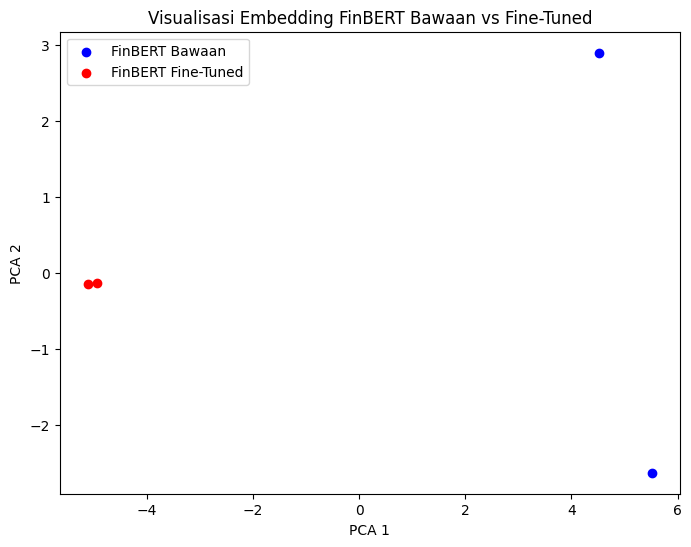

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Gabungkan embedding dari kedua model
embeddings = np.array([
    avg_embedding(embedding_1_orig), avg_embedding(embedding_2_orig),
    avg_embedding(embedding_1_tuned), avg_embedding(embedding_2_tuned)
])

# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(reduced_embeddings[:2, 0], reduced_embeddings[:2, 1], label="FinBERT Bawaan", color="blue")
plt.scatter(reduced_embeddings[2:, 0], reduced_embeddings[2:, 1], label="FinBERT Fine-Tuned", color="red")
plt.legend()
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Embedding FinBERT Bawaan vs Fine-Tuned")
plt.show()


# Save output inference to Kaggle Dataset

In [3]:
import os
import json

# ✅ Define dataset variables
DATASET_FOLDER = "/kaggle/working/finbert-finetuning"  # Clean folder
DATASET_NAME = "finbert-finetuning"  # ✅ No ".npz" in dataset name!
USERNAME = "novirain"  # ✅ Replace with your actual Kaggle username

# ✅ Create dataset folder
os.makedirs(DATASET_FOLDER, exist_ok=True)

# ✅ Move the .npz file into the dataset folder
!mv /kaggle/working/finbert_finetuned.zip "{DATASET_FOLDER}/"

# ✅ Read Kaggle API credentials
with open("/kaggle/input/kaggle-json/kaggle (1).json") as f:
    kaggle_creds = json.load(f)

os.environ["KAGGLE_USERNAME"] = kaggle_creds["username"]
os.environ["KAGGLE_KEY"] = kaggle_creds["key"]

# ✅ Initialize Kaggle dataset
!kaggle datasets init -p "{DATASET_FOLDER}"

# ✅ Update dataset metadata
with open(f"{DATASET_FOLDER}/dataset-metadata.json") as f:
    dataset_meta = json.load(f)

dataset_meta["id"] = f"{USERNAME}/{DATASET_NAME}"  # ✅ No ".npz"
dataset_meta["title"] = DATASET_NAME  # ✅ No ".npz"

with open(f"{DATASET_FOLDER}/dataset-metadata.json", "w") as outfile:
    json.dump(dataset_meta, outfile)

# ✅ Upload dataset to Kaggle
!kaggle datasets create -p "{DATASET_FOLDER}" --dir-mode zip


Data package template written to: /kaggle/working/finbert-finetuning/dataset-metadata.json
Starting upload for file finbert_finetuned.zip
100%|██████████████████████████████████████| 2.66G/2.66G [00:31<00:00, 89.9MB/s]
Upload successful: finbert_finetuned.zip (3GB)
Your private Dataset is being created. Please check progress at https://www.kaggle.com/datasets/novirain/finbert-finetuning
